In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\91949\\Desktop\\data science"
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [5]:
x,y=mnist['data'],mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

so there are 70000 images and each image has 784 features. this is because each image is 28*28 pixels.and each feature simply
represents one pixels intensity from 0(white) to 255(black)
Lets take a peek at one digit from dataset. and we need to get instance feature vector and need to reshape it to a 28*28 vector 
and display it using matplotlib imshow() function

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

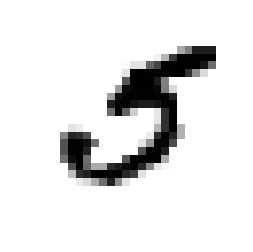

In [9]:
some_digit=x[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=plt.cm.binary,interpolation='nearest')
#to remove axis from image for clear image
plt.axis('off')
plt.show()

this loooks like five . indeed thats what the label y tells us

In [10]:
y[36000]

5

In [11]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [12]:
x_test.shape

(10000, 784)

In [13]:
#x_train=x[:60000]
#y_train.shape
x_train.shape

(60000, 784)

You should always create a test	set and	set	it aside before	inspecting the data	closely.The MNIST	dataset	is	actually	already	split into a training set(the first	60,000 images) and a testset(the	last 10,000	images):

lets also shuffle the training indices. by this we can avoid the repistition of same training instances for getting optimistic results

In [14]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train, y_train=x_train[shuffle_index], y_train[shuffle_index]

In [15]:
y[49692]

8

In [16]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
from pylab import *

In [17]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


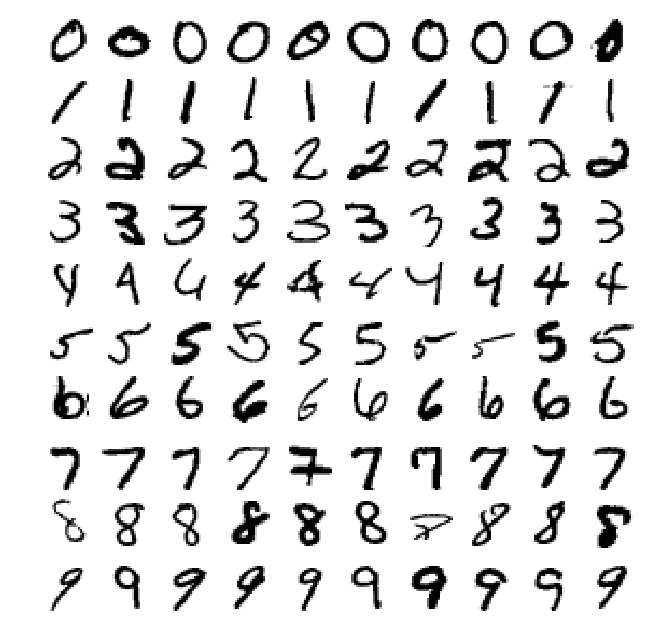

In [18]:
plt.figure(figsize=(9,9))
example_images = np.r_[x[:12000:600], x[13000:30600:600], x[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig ("more_digits_plot")
plt.show()

# training a binay classifier

#lets try to identify some digit 5. here we need to find if the digit is 5or not 5. so its type of a classification task

In [19]:
#target vectors
y_train_5=(y_train==5)
y_test_5=(y_test==5)

need to pick a classifier and train it. we r using SGDclassifier(stotastic gradient descent classifier).this classifier is good at dealith with large amounts of dataset.. and this classifier deals with training instances independently one at atime. so it suis more for online learning

In [20]:
#create a sgd classifier and train it
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5,tol=-np.infty,random_state=42)
sgd_clf.fit(x_train,y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

The	SGDClassifier	relies	on	randomness	during	training	(hence	the	name	“stochastic”).	If	you	want	reproducible	results,	you should	set	the	random_state	parameter.


now we can use this to predict the image 5

In [21]:
sgd_clf.predict([some_digit])

array([ True])

The	classifier	guesses	that	this	image	represents	a	5	(True).	Looks	like	it	guessed	right	in	this	particular case!	Now,	let’s	evaluate	this	model’s	performance.

# Performance	Measures 

Evaluating	a	classifier	is	often	significantly	trickier	than	evaluating	a	regressor,	so	we	will	spend	a	large part	of	this	chapter	on	this	topic.	There	are	many	performance	measures	available

# Measuring	Accuracy	Using	Cross-Validation

IMPLEMENTING	CROSS-VALIDATION

Occasionally	you	will	need	more	control	over	the	cross-validation	process	than	what	cross_val_score()	and	similar	functions	provide. In	these	cases,	you	can	implement	cross-validation	yourself;	it	is	actually	fairly	straightforward.	The	following	code	does	roughly	the same	thing	as	the	preceding	cross_val_score()	code,	and	prints	the	same	result:


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf=clone(sgd_clf)
    x_train_fold=x_train[train_index]
    y_train_fold=(y_train_5[train_index])
    x_test_fold=x_train[test_index]
    y_test_fold=(y_train_5[test_index])
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct= sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9502
0.96565
0.96495


In [23]:
n_correct

19299

In [24]:
y_pred

array([ True,  True,  True, ..., False, False, False])

In [25]:
acc=(n_correct/len(y_pred))

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy") 

array([0.9502 , 0.96565, 0.96495])

In [27]:
acc

0.96495

In [28]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self ,X):
        return np.zeros((len(X),1),dtype=bool)

In [29]:
never5_clf=Never5Classifier()

In [34]:
cross_val_score(never5_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

# Confusion Matrix

a better way to evaluate performance of a classifier is confusion matrix
GENERAL IDEA: COUNT THE NO OF TIMES INSTANCE OF CLASSES AS CLASSIFIED B

To compute the confusion matrix,you first need to have a set of predictions,so they can be compared to the actual targets.You could makepredictions onthe test set,but let’s keep itu ntouched fornow (remember that you want to use the test setonly at theveryendofyour project,onceyouhaveaclassifier that you are ready to launch).Instead, you can use the cross_val_predict()function:


In [35]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

In [37]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

NameError: name 'y_train_perfect_predictions' is not defined

here we have to know the accuarcy of positive predictions(precision)or specificity

precision=tp/tp+fp
here 8505 is tn and 603 fp and 139 as fn and 753 as tp

RECALL=TP/TP+FN 

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_5,y_train_pred)

In [ ]:
recall_score(y_train_5,y_train_pred)

In [ ]:
#we can use f1 score which is useful when comparing two classifiers
f1_score(y_train_5,y_train_pred)

# PRECISION RECALL TRADEOFF

To understand this tradeoff, let’s look at how the SGDClassifier mak sits classification decisions. For each instance, it computes a score based on a decision function, and ifthat score is greater than a threshold, it assigns the instance to the positive class, or els it assigns it to the negative class.

In [38]:
 #DECISION FUNCTION
    #PROCESS: HERE WE HAVE TO FND THE DECISION SCORES FOR EACH INSTANCE USING DECISION FUNCTION INSTEAD OF PREDICT FUNCTION.
    #2. AFTER GETTING DECISION SCORES WE HAVE TO PREDICT BASED ON THE THRESHOLD VALUE.
    #HERE WE NAMED DECISION SCORES AS Y_SCORES
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [39]:
#above we got the decisioon score for the some digit instance
#now we have to set threshold value
threshold=0
#now we have to predict the some digit (is it greater than threshold or not(we  r predicting based on threshold))
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [40]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores
threshold=200000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

if u increases threshold the 5detector unabel to recognise 5

In [41]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')

In [42]:
y_scores.shape

(60000,)

In [43]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [44]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

Saving figure precision_recall_vs_threshold_plot


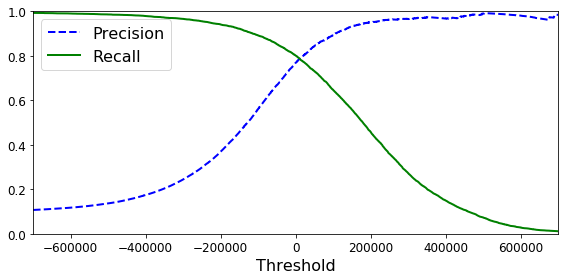

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()


Saving figure precision_vs_recall_plot


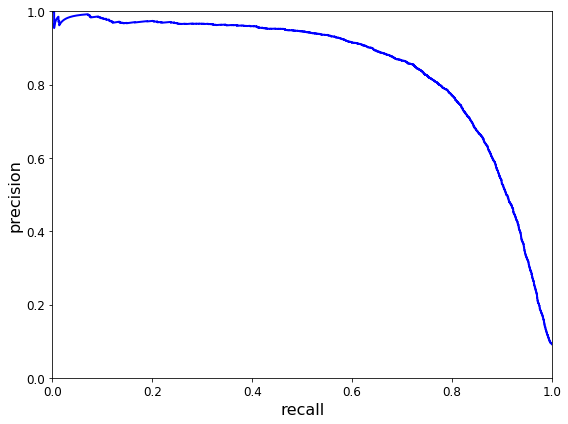

In [46]:
 def plot_precision_vs_recall(precisions,recalls):
        plt.plot(recalls,precisions,'b-',linewidth=2)
        plt.ylabel('precision',fontsize=16)
        plt.xlabel('recall',fontsize=16)
        plt.axis([0,1,0,1])
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()
    

here the precision drops at 80% of recall.... so we have select threshold before it drops
for suppose we want precision of 90% then we have to put threshold about 70000

In [47]:
# here we want 90 precision so we create a vaiable 'y_train_pred_90 ' by giving condition y_score(decision score) greater than the 70000
y_train_pred_90=(y_scores>70000)

In [48]:
# chek this variable can give 90 precision or not 
precision_score(y_train_5, y_train_pred_90)

NameError: name 'precision_score' is not defined

In [ ]:
recall_score(y_train_5,y_train_pred_90)

#a high precision classifier is not very useful if it has low recall

if someone says 'lets reach 99% precision', u shouls ask him 'at what recall'

# THE ROC CURVE

1.The receiver operating characteristic curve(ROC) another common tool used with classifiers

2.it plots the True Positive Rate(TPR OR RECALL) versus False Positive Rate(FPR)

3.FPR is the ratio of the negative instances that are wrongly classifid as positive

4.so it is  equal to 1-TNR (which is the ratio of the negative instances that are correctly  classified as negative
        s0    FPR=1-TNR                

5.HERE TNR is also called as precision or specifity. so FPR=1-SPECIFICITY

6.hence ROC CURVE plots between recall vs 1-precision

In [49]:
#first we have to compute the fpr,tpr to plot ROC curve
from sklearn.metrics import roc_curve
tpr,fpr,threshold=roc_curve(y_train_5,y_scores)
#by above code, we will get the tpr, fpr values

In [50]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99446674, 0.99446674,
       1.        ])

In [51]:
fpr

array([0.00000000e+00, 1.84467810e-04, 3.87382402e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

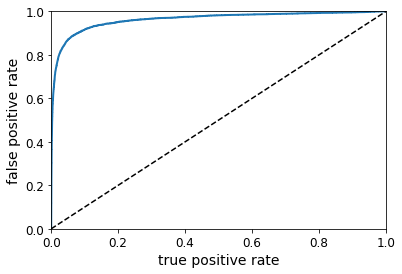

In [52]:
#after getting the values fpr,tpr we can plot tpr vs fpr usig matplotlib
def plot_roc_curve(tpr,fpr,label=None):
    plt.plot(tpr,fpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.ylabel('false positive rate')
    plt.xlabel('true positive rate')
plot_roc_curve(tpr,fpr)
plt.show()

Saving figure roc_curve_plot


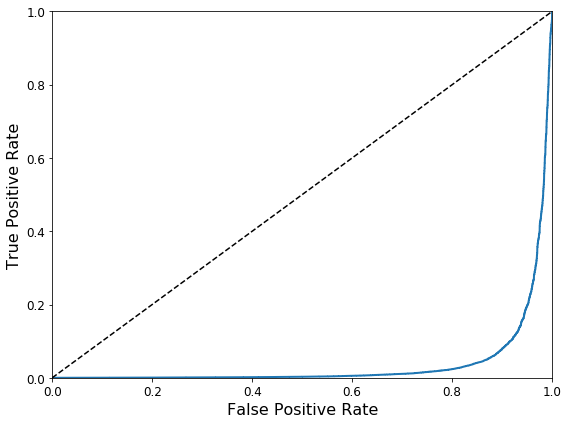

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

#the higher recall(tpr) , the more fpr classifier produces

2.the dotted line is the roc curve of purely random classifier

3.the good classifier stays as far away from that dotted line

4.we can compare the classifiers with AREA UNDER CURVE(AUC)

5.perfect classifier will have auc score equal to 1 whereas purely classifier will have auc equal to 0.5

6.BY USING roc_curve_auc we can get the auc score

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9624496555967156

lets train a random forest classifier and compare its roc curve and auc score with sgd classifier

so first u need  to get the decision scores for each instance in the training set.

but random forest classifier doesnt have decision fnction method.so what to do??

instead of decision function random forest has predict_proba function method. so what is predict proba?? and how it works???

PREDICT_PROBA() returns an array with a row per instance, a column for each class,each contaning the probability that the given image belongs to 5 or not5

In [55]:
# need to get the scores for each instances
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=10,random_state=42)
y_proba_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [56]:
# here we got the probabilities of random forest classifier
# but we need scores to plot roc curve ...... so we have to convert probabilitoes as scores 
#simple solution is to use positive class probability as score
y_scores_forest=y_proba_forest[:,1]#this is positive class of proba
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

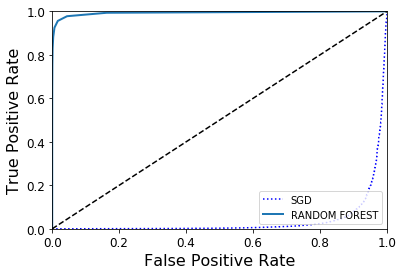

In [57]:
plt.plot(fpr,tpr,'b:',label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"RANDOM FOREST")
plt.legend(loc='lower right')
plt.show()

Saving figure roc_curve_comparison_plot


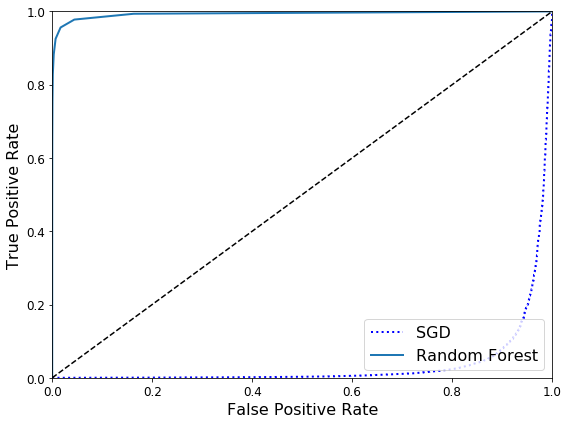

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [59]:
roc_auc_score(y_train_5,y_scores_forest)

0.9931243366003829

In [60]:
roc_auc_score(y_train_5,y_scores)

0.9624496555967156

In [61]:
y_pred_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3)

In [67]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_pred_forest)

0.9852973447443494

In [68]:
recall_score(y_train_5,y_pred_forest)

0.8282604685482383

so we have 98.5% precision and 82% recall.. this is not bad

Hopefully you now know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall tradeoff  that fits your needs, and compare various models using ROC curves and ROC AUC scores.Now let’s try to detect more than just the 5s.

# Multiclass Classification 

whereas binary classifiers distinguish between two classes ,multi classifier distinguish between more than two classes

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However,there are various strategies that you can use to perform multiclass classification using multiple binary classifiers. 

there are two various straregies.

1.	one	way	to	create	a	system	that	can	classify	the	digit	images	into	10	classes	(from	0	to	9)	is to	train	10	binary	classifiers,	one	for	each	digit	(a	0-detector,	a	1-detector,	a	2-detector,	and	so	on).	Then when	you	want	to	classify	an	image,	you	get	the	decision	score	from	each	classifier	for	that	image	and	you select	the	class	whose	classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

2.Another	strategy	is	to	train	a	binary	classifier	for	every	pair	of	digits:	one	to	distinguish	0s	and	1s, another	to	distinguish	0s	and	2s,	another	for	1s	and	2s,	and	so	on.	This	is	called	the	one-versus-one (OvO)	strategy.	If	there	are	N	classes,	you	need	to	train	N	×	(N	–	1)	/	2	classifiers.	For	the	MNIST problem,	this	means	training	45	binary	classifiers!	When	you	want	to	classify	an	image,	you	have	to	run the	image	through	all	45	classifiers	and	see	which	class	wins	the	most	duels.	The	main	advantage	of	OvO is	that	each	classifier	only	needs	to	be	trained	on	the	part	of	the	training	set	for	the	two	classes	that	it	must distinguish.

Some	algorithms	(such	as	Support	Vector	Machine	classifiers)	scale	poorly	with	the	size	of	the	training set,	so	for	these	algorithms	OvO	is	preferred	since	it	is	faster	to	train	many	classifiers	on	small	training sets	than	training	few	classifiers	on	large	training	sets.	For	most	binary	classification	algorithms, however,	OvA	is	preferred.

Scikit-Learn	detects	when	you	try	to	use	a	binary	classification	algorithm	for	a	multiclass	classification task,	and	it	automatically	runs	OvA	(except	for	SVM	classifiers	for	which	it	uses	OvO).	Let’s	try	this	with the	SGDClassifier:


In [69]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

That	was	easy!	This	code	trains	the	SGDClassifier	on	the	training	set	using	the	original	target	classes from	0	to	9	(y_train),	instead	of	the	5-versus-all	target	classes	(y_train_5).	Then	it	makes	a	prediction (a	correct	one	in	this	case).	Under	the	hood,	Scikit-Learn	actually	trained	10	binary	classifiers,	got	their decision	scores	for	the	image,	and	selected	the	class	with	the	highest	score. 

In [70]:
#here we want decision scores for the classifier sgd. so we use decision function in sgd classifier giving some digit as data 
# and stored the scores in the variable some_digit_scores
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [71]:
some_digit_scores.max()

161855.74572176492

In [72]:
np.argmax(some_digit_scores)

5

In [73]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [74]:
sgd_clf.classes_[5]

5

When	a	classifier	is	trained,	it	stores	the	list	of	target	classes	in	its	classes_	attribute,	ordered	by	value

If	you	want	to	force	ScikitLearn	to	use	one-versus-one	or	one-versus-all,	you	can	use	the OneVsOneClassifier	or	OneVsRestClassifier	classes.	Simply	create	an	instance	and	pass	a	binary classifier	to	its	constructor.	For	example,	this	code	creates	a	multiclass	classifier	using	the	OvO	strategy, based	on	a	SGDClassifier:


In [75]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(max_iter=5,tol=-np.infty,random_state=42))
ovo_clf.fit(x_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [76]:
len(ovo_clf.estimators_)

45

train a random forest classifier:

In [77]:
forest_clf.fit(x_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

This	time	Scikit-Learn	did	not	have	to	run	OvA	or	OvO	because	Random	Forest	classifiers	can	directly classify	instances	into	multiple	classes.	You	can	call	predict_proba()	to	get	the	list	of	probabilities	that the	classifier	assigned	to	each	instance	for	each	class:


In [78]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

You	can	see	that	the	classifier	is	fairly	confident	about	its	prediction:	the	0.8	at	the	5th	index	in	the	array means	that	the	model	estimates	an	80%	probability	that	the	image	represents	a	5.	It	also	thinks	that	the image	could	instead	be	a	0	or	a	3	(10%	chance	each). 

Now	of	course	you	want	to	evaluate	these	classifiers.	As	usual,	you	want	to	use	cross-validation.	Let’s evaluate	the	SGDClassifier’s	accuracy	using	the	cross_val_score()	function:

In [79]:
cross_val_score(sgd_clf,x_train,y_train,scoring='accuracy',cv=3)

array([0.84063187, 0.84899245, 0.86652998])

here the accuarcy is more than 84% in each test folds... and we can increase the accuracy by simply scaling the inputs

In [80]:
#scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.91011798, 0.90874544, 0.906636  ])

now the accuracy reaches over 90% in each fold.... by scaling, the performance increases

# ERROR ANALYSIS

Of	course,	if	this	were	a	real	project,	you	would	follow	the	steps	in	your	Machine	Learning	project checklist:	exploring	data	preparation	options,	trying	out	multiple	models,	shortlisting the	best	ones	and	fine-tuning	their	hyperparameters	using	GridSearchCV,	and	automating	as	much	as possible,	as	you	did	in	the	previous	chapter.	Here,	we	will	assume	that	you	have	found	a	promising	model and	you	want	to	find	ways	to	improve	it.	One	way	to	do	this	is	to	analyze	the	types	of	errors	it	makes. First,	you	can	look	at	the	confusion	matrix.	You	need	to	make	predictions	using	the cross_val_predict()	function,	then	call	the	confusion_matrix()	function,

1.HERE WE WANT TO IMPROVE  OUR PROMISING MODEL


2.SO WE HAVE TO FIND THE ERRORS HAPPENED IN IT

3.TO KNOW THE WRONGLY CLASSIFIED INSTANCES(ERRORS) WE HAVE  TO USE CONFUSION_MATRIX WHICH SHOWS YOU FALSE POSITIVES, FALSE NGATIVES, TRUE POSITIVES, TRUE NEGATIVES

In [81]:
#PREDICT USING CROSS_VAL_PREDICT BY SENDING CLASSIFIER, SCALED TRAINING SET, SCALED Y RAINING SET
#HERE WE R USING Y_TRAN_PRED VARIABLE TO STORE PREDICTED SCORES 
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)

In [82]:
conf_mx=confusion_matrix(y_train,y_train_pred)

In [83]:
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

theres lot of numbers...so for better understanding we need to plot this confusion matrix using matplotlib matshow( ) function

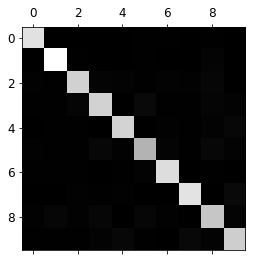

In [84]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

This	confusion	matrix	looks	fairly	good,	since	most	images	are	on	the	main	diagonal,	which	means	that they	were	classified	correctly.	The	5s	look	slightly	darker	than	the	other	digits,	which	could	mean	that there	are	fewer	images	of	5s	in	the	dataset	or	that	the	classifier	does	not	perform	as	well	on	5s	as	on	other digits.	In	fact,	you	can	verify	that	both	are	the	case. 

Let’s	focus	the	plot	on	the	errors.	First,	you	need	to	divide	each	value	in	the	confusion	matrix	by	the number	of	images	in	the	corresponding	class,	so	you	can	compare	error	rates	instead	of	absolute	number
of	errors	(which	would	make	abundant	classes	look	unfairly	bad):


In [85]:
row_sums=conf_mx.sum(axis=1,keepdims=True)

In [87]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [88]:
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

In [91]:
norm_conf_mx=row_sums/conf_mx

C:\Users\91949\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [92]:
norm_conf_mx

array([[1.03458515e+00, 1.97433333e+03, 2.46791667e+02, 6.58111111e+02,
        5.92300000e+02, 1.20877551e+02, 1.18460000e+02, 5.92300000e+02,
        1.51871795e+02, 1.48075000e+03],
       [3.37100000e+03, 1.03834899e+00, 1.56790698e+02, 2.69680000e+02,
        9.63142857e+02, 1.68550000e+02, 1.34840000e+03, 6.74200000e+02,
        6.18532110e+01, 8.42750000e+02],
       [1.16823529e+02, 1.45317073e+02, 1.11971434e+00, 5.72884615e+01,
        6.69438202e+01, 2.29153846e+02, 6.84827586e+01, 9.93000000e+01,
        3.58915663e+01, 4.58307692e+02],
       [1.30446809e+02, 1.33282609e+02, 4.34822695e+01, 1.14769749e+00,
        6.13100000e+03, 2.65411255e+01, 1.53275000e+02, 1.22620000e+02,
        4.34822695e+01, 6.66413043e+01],
       [3.07473684e+02, 2.01448276e+02, 1.42487805e+02, 5.84200000e+02,
        1.08870667e+00, 6.49111111e+02, 1.04321429e+02, 1.57891892e+02,
        6.79302326e+01, 3.09100529e+01],
       [7.42602740e+01, 1.20466667e+02, 1.50583333e+02, 2.80880829e+01,
   

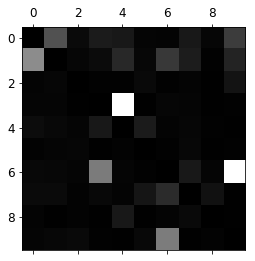

In [94]:
#lets fill diagonal with zeros to keep onlythe errors
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

Saving figure error_analysis_digits_plot


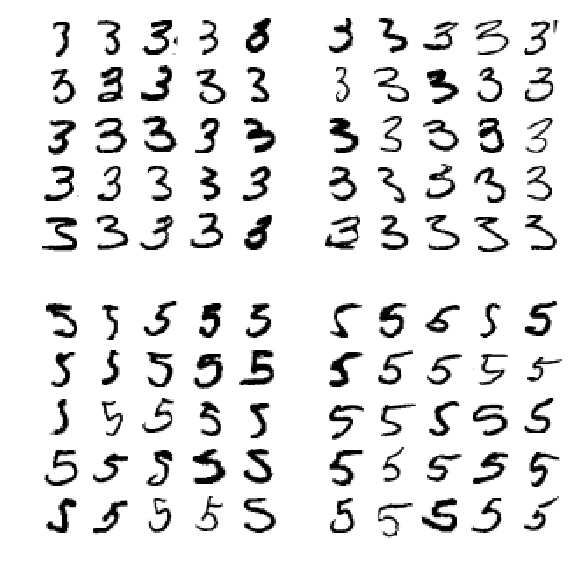

In [99]:
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

The	two	5×5	blocks	on	the	left	show	digits	classified	as	3s,	and	the	two	5×5	blocks	on	the	right	show images	classified	as	5s.	Some	of	the	digits	that	the	classifier	gets	wrong	(i.e.,	in	the	bottom-left	and	topright	blocks)	are	so	badly	written	that	even	a	human	would	have	trouble	classifying	them	(e.g.,	the	5	on the	8th	row	and	1st	column	truly	looks	like	a	3).	However,	most	misclassified	images	seem	like	obvious errors	to	us,	and	it’s	hard	to	understand	why	the	classifier	made	the	mistakes	it	did.3	The	reason	is	that	we used	a	simple	SGDClassifier,	which	is	a	linear	model.	All	it	does	is	assign	a	weight	per	class	to	each pixel,	and	when	it	sees	a	new	image	it	just	sums	up	the	weighted	pixel	intensities	to	get	a	score	for	each
class.	So	since	3s	and	5s	differ	only	by	a	few	pixels,	this	model	will	easily	confuse	them. The	main	difference	between	3s	and	5s	is	the	position	of	the	small	line	that	joins	the	top	line	to	the	bottom arc.	If	you	draw	a	3	with	the	junction	slightly	shifted	to	the	left,	the	classifier	might	classify	it	as	a	5,	and vice	versa.	In	other	words,	this	classifier	is	quite	sensitive	to	image	shifting	and	rotation.	So	one	way	to reduce	the	3/5	confusion	would	be	to	preprocess	the	images	to	ensure	that	they	are	well	centered	and	not too	rotated.	This	will	probably	help	reduce	other	errors	as	well

# Multilabel	Classification

Until	now	each	instance	has	always	been	assigned	to	just	one	class.	In	some	cases	you	may	want	your classifier	to	output	multiple	classes	for	each	instance.	For	example,	consider	a	face-recognition classifier:	what	should	it	do	if	it	recognizes	several	people	on	the	same	picture?	Of	course	it	should attach	one	label	per	person	it	recognizes.	Say	the	classifier	has	been	trained	to	recognize	three	faces, Alice,	Bob,	and	Charlie;	then	when	it	is	shown	a	picture	of	Alice	and	Charlie,	it	should	output	[1,	0,	1] (meaning	“Alice	yes,	Bob	no,	Charlie	yes”).	Such	a	classification	system	that	outputs	multiple	binary labels	is	called	a	multilabel	classification	system. 

In [103]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)#creating label
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

This	code	creates	a	y_multilabel	array	containing	two	target	labels	for	each	digit	image:	the	first indicates	whether	or	not	the	digit	is	large	(7,	8,	or	9)	and	the	second	indicates	whether	or	not	it	is	odd. The	next	lines	create	a	KNeighborsClassifier	instance	(which	supports	multilabel	classification,	but not	all	classifiers	do)	and	we	train	it	using	the	multiple	targets	array.	Now	you	can	make	a	prediction,	and notice	that	it	outputs	two	labels:


In [104]:
#prdicting using predict function with knn classifier
knn_clf.predict([some_digit])

array([[False,  True]])

the digit is 5 indded its not large and odd

In [106]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

NameError: name 'f1_score' is not defined

# Multioutput	Classification

The	last	type	of	classification	task	we	are	going	to	discuss	here	is	called	multioutput-multiclass classification	(or	simply	multioutput	classification).	It	is	simply	a	generalization	of	multilabel classification	where	each	label	can	be	multiclass	(i.e.,	it	can	have	more	than	two	possible	values). To	illustrate	this,	let’s	build	a	system	that	removes	noise	from	images.	It	will	take	as	input	a	noisy	digit image,	and	it	will	(hopefully)	output	a	clean	digit	image,	represented	as	an	array	of	pixel	intensities,	just like	the	MNIST	images.	Notice	that	the	classifier’s	output	is	multilabel	(one	label	per	pixel)	and	each label	can	have	multiple	values	(pixel	intensity	ranges	from	0	to	255).	It	is	thus	an	example	of	a	multioutput classification	system.


#first find noise data
Let’s	start	by	creating	the	training	and	test	sets	by	taking	the	MNIST	images	and	adding	noise	to	their	pixel intensities	using	NumPy’s	randint()	function.	The	target	images	will	be	the	original	images:

In [121]:
# adding noise by creating it using randint
noise=np.random.randint(0,100,x_train.shape)
#noise=np.random.randint(0,100,x_test.shape)
x_train_mod=x_train+noise 
#x_test_mod=x_test+noise
y_train_mod=x_train
y_test_mod=x_test


In [122]:
noise=np.random.randint(0,100,(x_test.shape))
x_test_mod=x_test+noise

Saving figure noisy_digit_example_plot


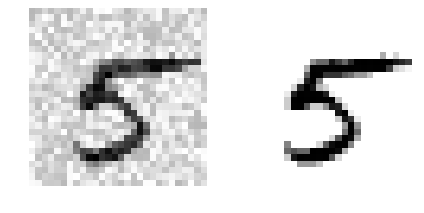

In [123]:
some_index = 5500
plt.subplot(121); plot_digit(x_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

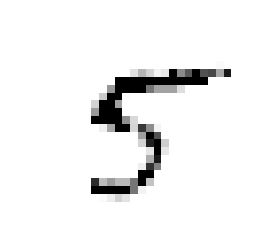

In [125]:
knn_clf.fit(x_train_mod,y_train_mod)
clean_digit=knn_clf.predict([x_test_mod[some_index]]) 
plot_digit(clean_digit)